# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [3]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

print(len(sample))

130


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

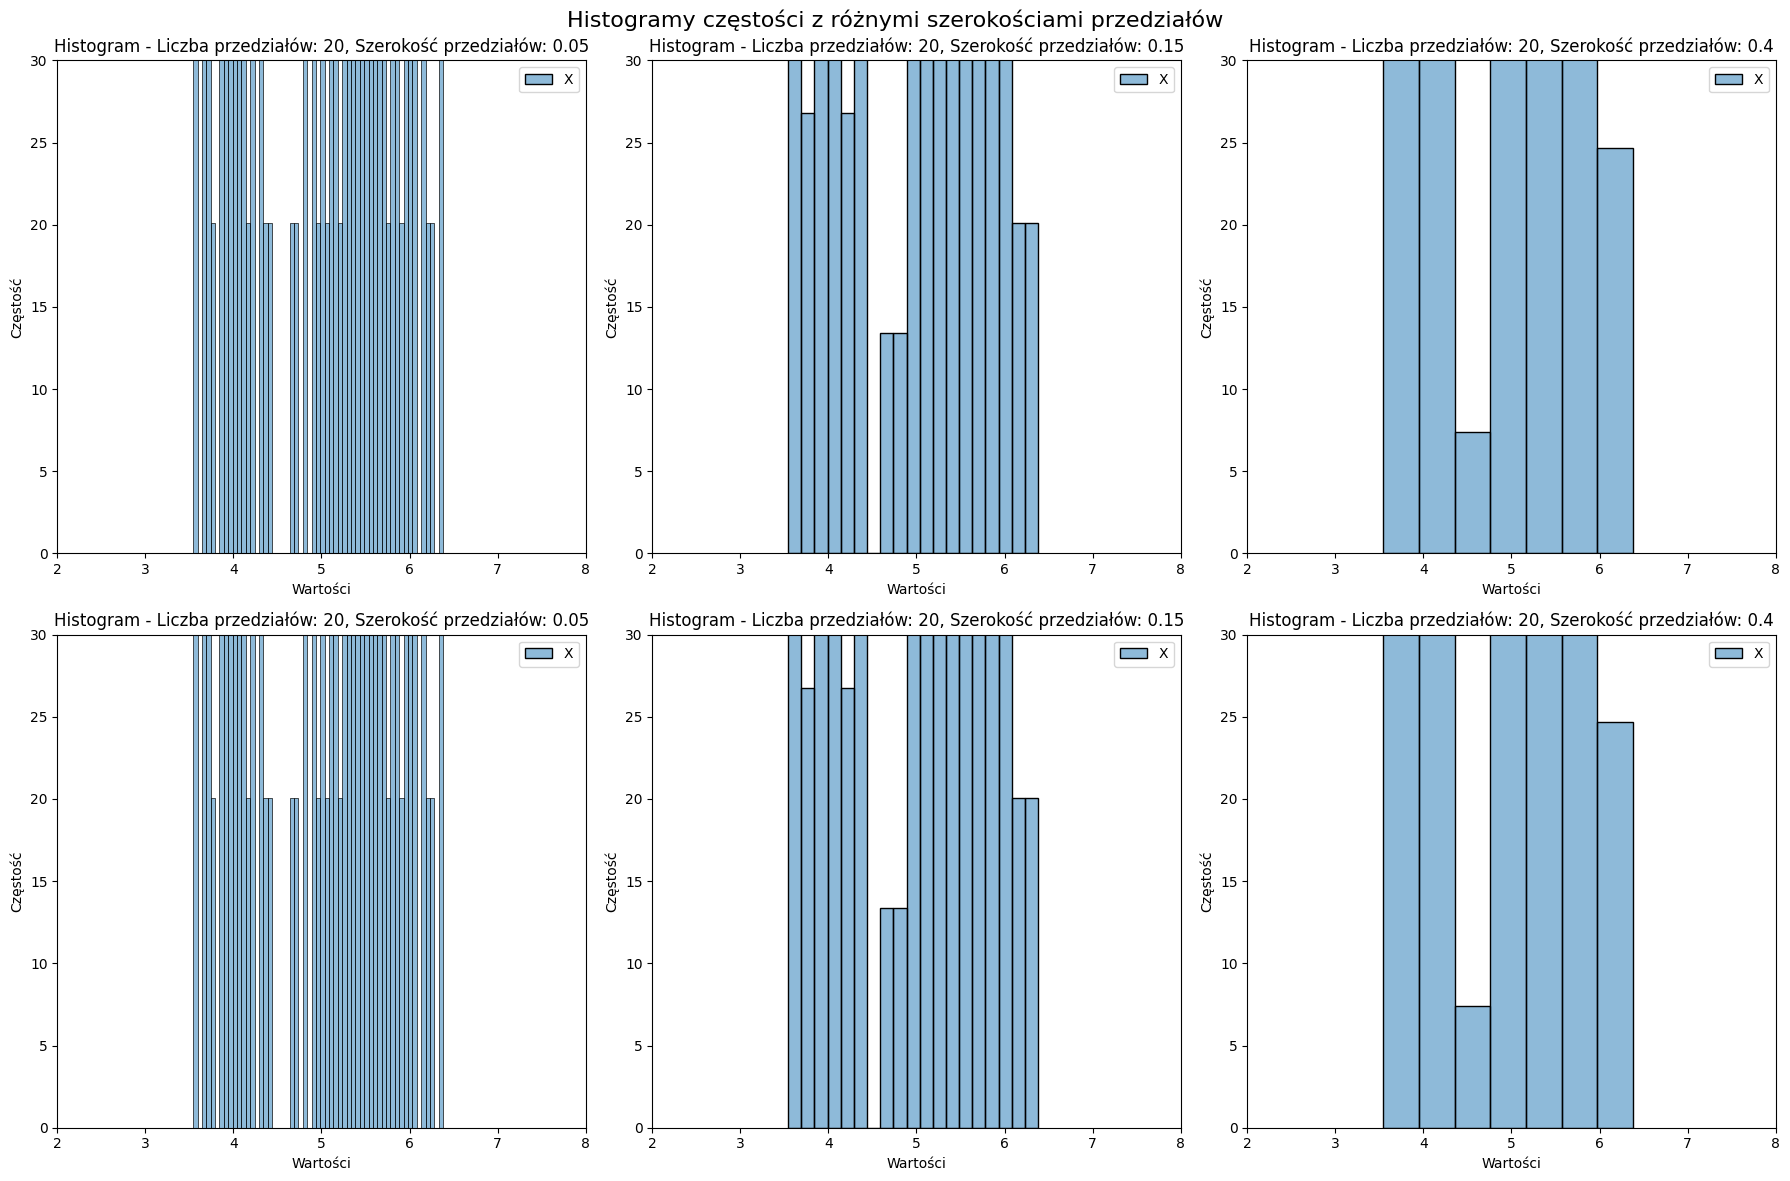

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histogram(bins, binwidth, ax):
    # Tworzenie histogramu przy użyciu seaborn.histplot
    sns.histplot(sample, bins=bins, binwidth=binwidth, ax=ax, stat='frequency') #    liczba przedzialow i szerokosc przedzialow 
    # Dodanie wizualnej reprezentacji danych
    ax.scatter(sample, np.full_like(sample, -0.5), marker='+', color='red')
    # Ustawienie zakresów osi
    
    ax.set_xlim(2, 8)
    ax.set_ylim(0, 30)
    # Dodanie tytułu i etykiet osi
    ax.set_title(f'Histogram - Liczba przedziałów: {bins}, Szerokość przedziałów: {binwidth}')
    ax.set_xlabel('Wartości')
    ax.set_ylabel('Częstość')
# Utworzenie pojedynczej figury z 2x3 pola na wykres
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# Definicja list granic przedziałów i tytułów
bin_widths = [0.05, 0.15, 0.4]
# Iteracja po każdym polu na wykres
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        # Wywołanie funkcji plot_histogram dla danej liczby przedziałów i szerokości przedziałów
        plot_histogram(bins=20, binwidth=bin_widths[j], ax=ax)
fig.suptitle('Histogramy częstości z różnymi szerokościami przedziałów', fontsize=16)
plt.tight_layout()
plt.show()


### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def simple_kde_estimation(data, estimation_points=100, sigma=0.2):
    # Konwersja danych do tablicy numpy
    #data = np.asarray(data)
    # Obliczenie minimum i maksimum danych
    x_min = data.min()
    x_max = data.max()
    # Generowanie punktów estymacji
    points = np.linspace(x_min - 3 * sigma, x_max + 3 * sigma, estimation_points)
    points = points.ravel()
    # Obliczenie wartości funkcji jądrowej dla każdego punktu estymacji
    kde_values = np.zeros_like(points)
    for i, point in enumerate(points):
        kde_values[i] = np.sum(norm.pdf(data, loc=point, scale=sigma))
    # Standaryzacja wartości funkcji jądrowej
    d = (x_max - x_min) / (len(data) - 1)
    area = np.sum(kde_values) * (points[1] - points[0])
    kde_values /= area
    #print(points)
       # Przybliżenie pola powierzchni pod funkcją 
    # Złożenie punktów estymacji i wartości estymowanej funkcji jądrowej w Pandas DataFrame
    dataframe = pd.DataFrame({'X': points, 'KDE': kde_values})
    # Wykreślenie wykresu
    plt.plot(points, kde_values, color='blue', label='Estymowana funkcja jądrowa')
    plt.fill_between(points, 0, kde_values, color='blue', alpha=0.3)
    plt.scatter(data, np.full_like(data, -0.01), marker='|', color='red', label='Dane')

    plt.xlabel('Wartości')
    plt.ylabel('Gęstość prawdopodobieństwa')
    plt.title('Estymacja funkcją jądrową')
    plt.legend()
    plt.show()
    
    

    return dataframe









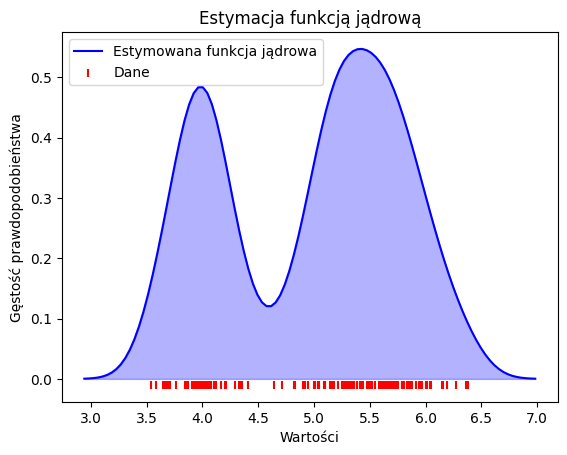

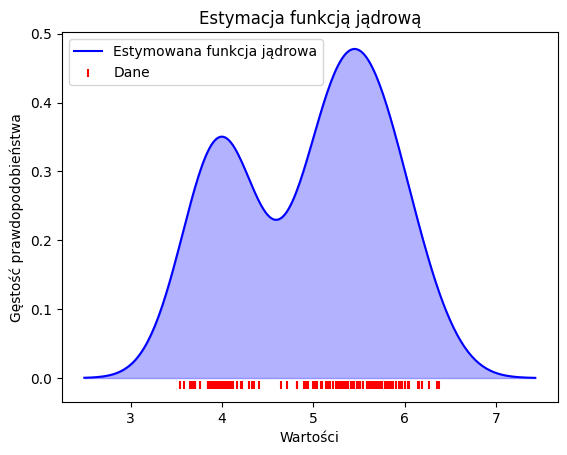

In [6]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

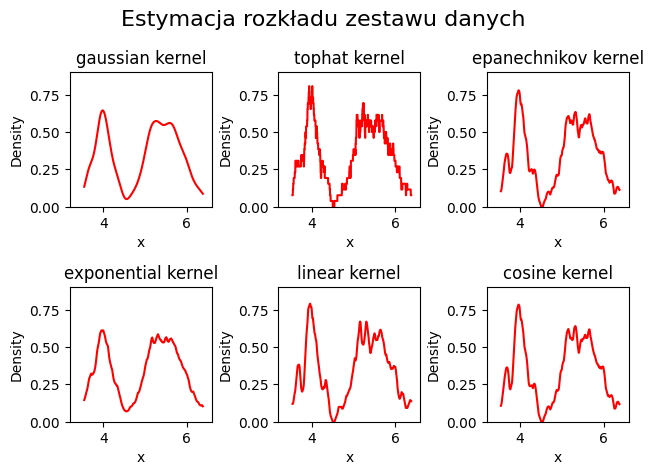

In [17]:

# Figura 1
# YOUR CODE HERE

fig,axes=plt.subplots(nrows=2,ncols=3)
names = ["gaussian","tophat","epanechnikov","exponential","linear","cosine"]
for i in range(len(names)):
        data = np.array(sample).reshape(-1, 1)
        kde = KernelDensity(bandwidth=0.1, kernel=names[i])
        kde.fit(data)
        x = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
        log_density = kde.score_samples(x)
        density = np.exp(log_density)
        # Plot the estimated densit
        #axes[i//3,i%3].hist(data,density=True,bins=30)
        axes[i//3,i%3].plot(x, density,color="red")
        axes[i//3,i%3].set_xlabel('x')
        axes[i//3,i%3].set_ylabel('Density')
        axes[i//3,i%3].set_title(names[i] + " kernel")
        axes[i//3,i%3].scatter(sample, np.full_like(sample, -0.5), marker="|", color='green')
plt.setp(axes,ylim=(0,0.9),xlim=(3.2,6.6))
fig.suptitle('Estymacja rozkładu zestawu danych', fontsize=16)
plt.tight_layout()
plt.show()

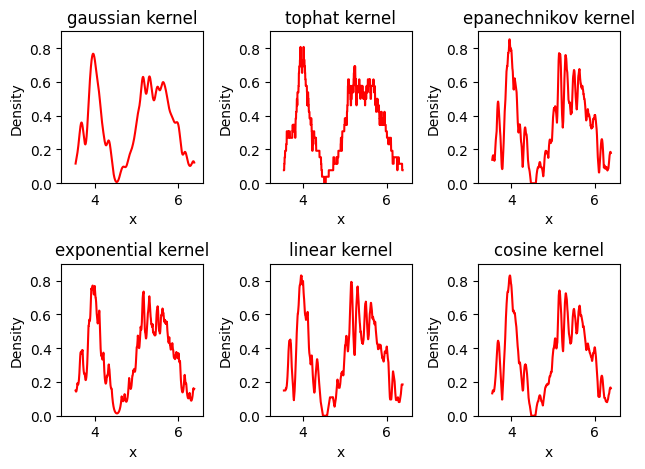

In [19]:
# Figura 2
# YOUR CODE HERE
fig,axes=plt.subplots(nrows=2,ncols=3)
names = ["gaussian","tophat","epanechnikov","exponential","linear","cosine"]
bandwidths = [0.05,0.1,0.06,0.04,0.07,0.07]
for i in range(len(names)):
        data = np.array(sample).reshape(-1, 1)
        kde = KernelDensity(bandwidth=bandwidths[i], kernel=names[i])
        kde.fit(data)
        x = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
        log_density = kde.score_samples(x)
        density = np.exp(log_density)

        # Plot the estimated density
        #axes[i//3,i%3].hist(data,density=True,bins=30)
        axes[i//3,i%3].plot(x, density,color="red")
        axes[i//3,i%3].set_xlabel('x')
        axes[i//3,i%3].set_ylabel('Density')
        axes[i//3,i%3].set_title(names[i] + " kernel")
plt.setp(axes,ylim=(0,0.9),xlim=(3.2,6.6))
plt.tight_layout()
plt.show()

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

Histogramy:
Plusy:

1)Prostota interpretacji: Histogramy są łatwe do zrozumienia i interpretacji, ponieważ przedstawiają liczbę obserwacji w poszczególnych przedziałach.
2)Szybka wizualizacja: Histogramy są szybką metodą wizualizacji rozkładu danych.
3)Łatwość doboru parametrów: W przypadku histogramów, parametry takie jak liczba przedziałów czy szerokość przedziałów mogą być łatwo dostosowane do danych lub preferencji użytkownika.
Minusy:

1)Wrażliwość na dobór parametrów: Dobór liczby przedziałów i szerokości przedziałów może znacząco wpłynąć na wygląd histogramu i interpretację danych.
2)Diskretność: Histogramy są dyskretne i mogą ukryć subtelne cechy rozkładu danych.
3)Brak gładkości: Wynikowy wykres jest zwykle "szorstki" z powodu dyskretności danych.
Estymacja jądrowa:
Plusy:

1)Gładkość: Estymacja jądrowa produkuje gładką krzywą, która lepiej odzwierciedla rzeczywisty rozkład danych.
2)Elastyczność: Estymacja jądrowa pozwala na dopasowanie krzywej do różnych kształtów rozkładu danych, niezależnie od ich rzeczywistego kształtu.
3)Niezależność od wyboru przedziałów: Estymacja jądrowa nie wymaga wyboru przedziałów ani szerokości przedziałów.
Minusy:

1)Wrażliwość na dobór parametrów: Wybór szerokości jądra (bandwidth) może znacząco wpłynąć na gładkość i szczegółowość wynikowej krzywej. Zbyt mała wartość może doprowadzić do przeuczenia, podczas gdy zbyt duża wartość może prowadzić do zbytniego wygładzenia i utraty szczegółów.
2)Wybór jądra: Różne rodzaje jąder mogą prowadzić do różnych estymacji, które są odpowiednie dla różnych typów danych.
Wniosek:
Dobór parametrów dla obu metod (liczba przedziałów, szerokość przedziałów dla histogramów; szerokość jądra dla estymacji jądrowej) jest kluczowy dla uzyskania poprawnego i czytelnego wyniku. Należy dążyć do znalezienia takich wartości parametrów, które najlepiej odzwierciedlą rzeczywisty rozkład danych, jednocześnie zachowując czytelność i interpretowalność wyników. Ostatecznie, wybór między histogramem a estymacją jądrową zależy od preferencji użytkownika oraz charakterystyki danych.

YOUR ANSWER HERE

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

130


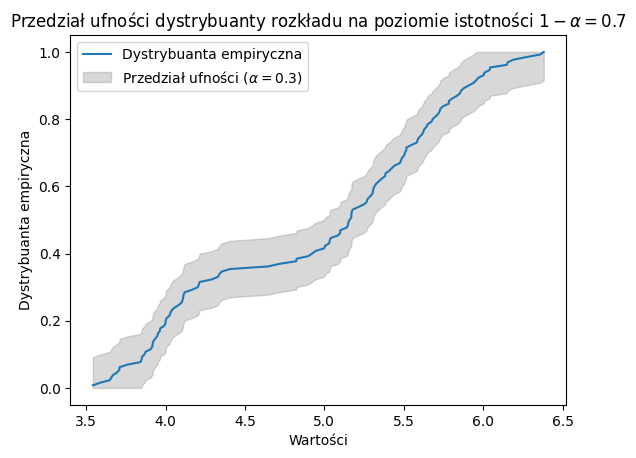

(130, 4)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstwo

def cdf_estimation(data, alpha):
    #print(len(data))
    n = len(data)
    print(n)
    sorted_data = np.sort(data, axis=0)
    empirical_cdf = np.arange(1, n + 1) / n
    sorted_data = sorted_data.ravel()
    # Obliczenie dystrybuanty z wartościami odczytanymi z rozkładu Kołmogorova-Smirnova
    D_alpha = kstwo.ppf(1 - alpha , n)
    lower_bound = np.maximum(0, empirical_cdf - D_alpha)
    upper_bound = np.minimum(1, empirical_cdf + D_alpha)
    #print(len(empirical_cdf))
    df = pd.DataFrame({
        'X': sorted_data,
        'F_d': empirical_cdf,
        'F_d_min': np.maximum(0, lower_bound),
        'F_d_max': np.minimum(1, upper_bound)
    })
    # Wykreślenie dystrybuanty empirycznej z przedziałem ufności
    plt.plot(sorted_data, empirical_cdf, label='Dystrybuanta empiryczna')
    plt.fill_between(sorted_data, lower_bound, upper_bound, color='gray', alpha=0.3,
                     label=f'Przedział ufności ($\\alpha={alpha}$)')
    plt.xlabel('Wartości')
    plt.ylabel('Dystrybuanta empiryczna')
    plt.title(f'Przedział ufności dystrybuanty rozkładu na poziomie istotności $1-\\alpha={1-alpha}$')
    plt.legend()
    plt.show()

    return df

test_results_3 = cdf_estimation(sample, 0.3)
print(test_results_3.shape)

130


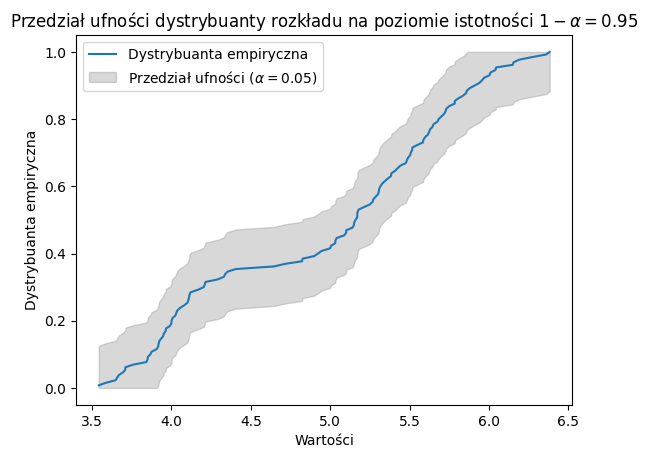

In [25]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))


In [ ]:

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))